In [5]:
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [7]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [41]:
df = pd.read_excel("chat_komei_results.xlsx", sheet_name="infolog")

In [42]:
df.head()

,ID,Method,total_num_fies,total_num_pages,min_num_tokens_per_page,mean_num_tokens_per_page,median_num_tokens_per_page,max_num_tokens_per_page,num_parent_chunks,min_num_tokens_per_parent_chunk,mean_num_tokens_per_parent_chunk,median_num_tokens_per_parent_chunk,max_num_tokens_per_parent_chunk,num_child_chunks,min_num_token_per_child_chunk,mean_num_token_per_child_chunk,median_num_token_per_child_chunk,max_num_token_per_child_chunk
0,1,adhocsentencegrouping,143,5143,0,1346,1228,9899,22020,10,290,288,4886,0,0,0,0,0
1,2,rcsplit,143,5143,0,1346,1228,9899,10559,1,771,955,1024,0,0,0,0,0
2,3,automerging,143,5143,0,1346,1228,9899,6077,1,1233,1241,4228,17864,1,527,654,1290
3,4,docsummary,143,5143,1,771,955,1024,5143,0,295,275,2025,10559,1,771,955,1024


In [43]:
df.isna().sum()

ID                                    0
Method                                0
total_num_fies                        0
total_num_pages                       0
min_num_tokens_per_page               0
mean_num_tokens_per_page              0
median_num_tokens_per_page            0
max_num_tokens_per_page               0
num_parent_chunks                     0
min_num_tokens_per_parent_chunk       0
mean_num_tokens_per_parent_chunk      0
median_num_tokens_per_parent_chunk    0
max_num_tokens_per_parent_chunk       0
num_child_chunks                      0
min_num_token_per_child_chunk         0
mean_num_token_per_child_chunk        0
median_num_token_per_child_chunk      0
max_num_token_per_child_chunk         0
dtype: int64

In [44]:
df.dtypes

ID                                     int64
Method                                object
total_num_fies                         int64
total_num_pages                        int64
min_num_tokens_per_page                int64
mean_num_tokens_per_page               int64
median_num_tokens_per_page             int64
max_num_tokens_per_page                int64
num_parent_chunks                      int64
min_num_tokens_per_parent_chunk        int64
mean_num_tokens_per_parent_chunk       int64
median_num_tokens_per_parent_chunk     int64
max_num_tokens_per_parent_chunk        int64
num_child_chunks                       int64
min_num_token_per_child_chunk          int64
mean_num_token_per_child_chunk         int64
median_num_token_per_child_chunk       int64
max_num_token_per_child_chunk          int64
dtype: object

<AxesSubplot: >

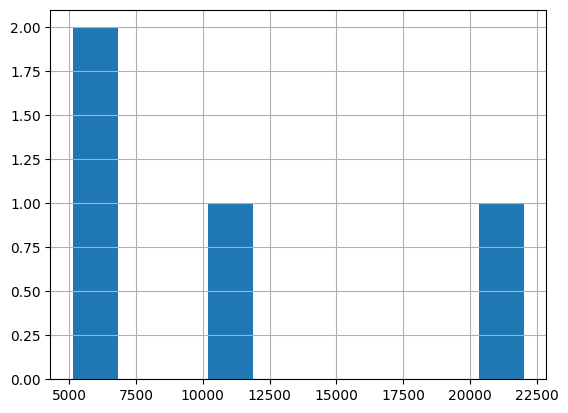

In [45]:
df["num_parent_chunks"].hist()

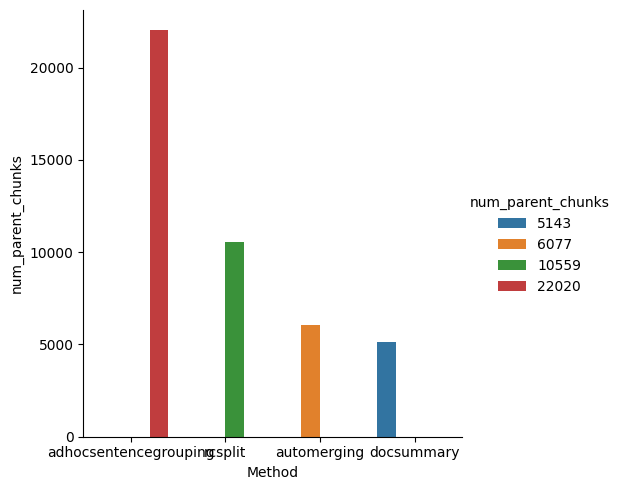

In [46]:
import seaborn as sns

sns.catplot(x = 'Method', y='num_parent_chunks', 
            hue = 'num_parent_chunks',data=df, 
            kind='bar')

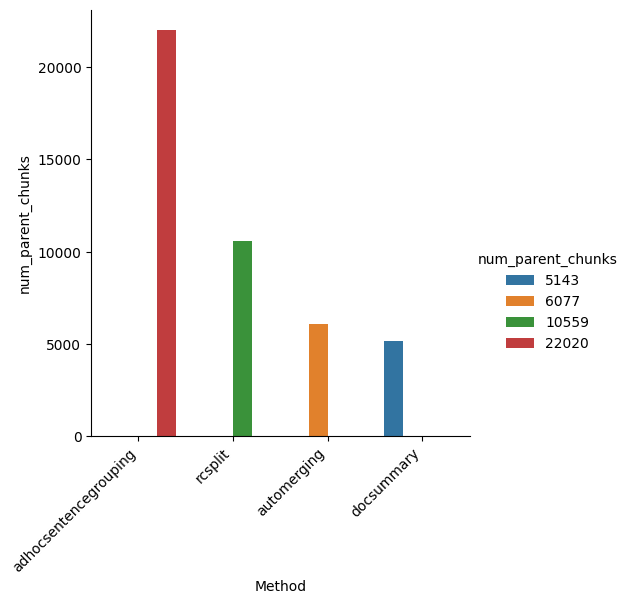

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'Method', y='num_parent_chunks', 
            hue = 'num_parent_chunks',data=df, 
            kind='bar')
plt.xticks(rotation=45, ha='right');

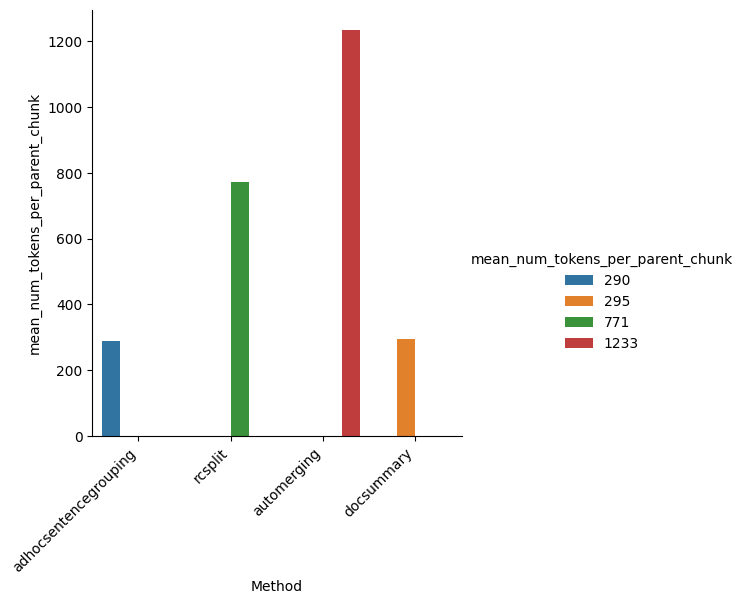

In [48]:
sns.catplot(x = 'Method', y='mean_num_tokens_per_parent_chunk', 
            hue = 'mean_num_tokens_per_parent_chunk',data=df, 
            kind='bar')
plt.xticks(rotation=45, ha='right');

In [72]:
df["Method"] = df["Method"].apply(lambda x:str(x))

In [73]:
df["Method"].unique()

array(['adhocsentencegrouping', 'rcsplit', 'automerging', 'docsummary'],
      dtype=object)

In [79]:

data = df[(df['Method'] =='automerging') | (df['Method'] =='docsummary')]

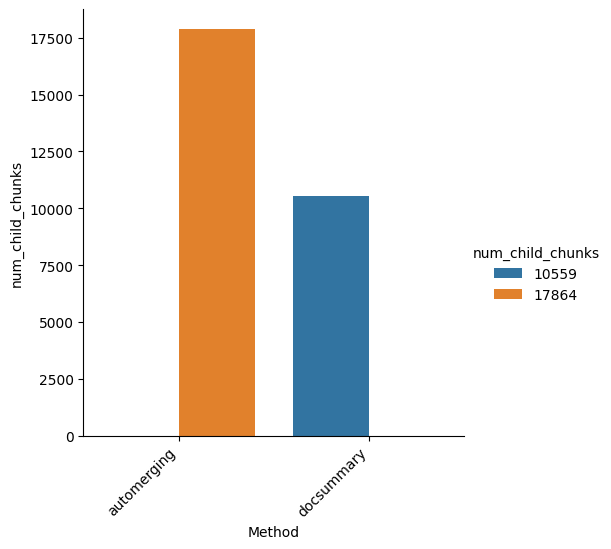

In [80]:
sns.catplot(x = 'Method', y='num_child_chunks', 
            hue = 'num_child_chunks',data=data, 
            kind='bar')
plt.xticks(rotation=45, ha='right');

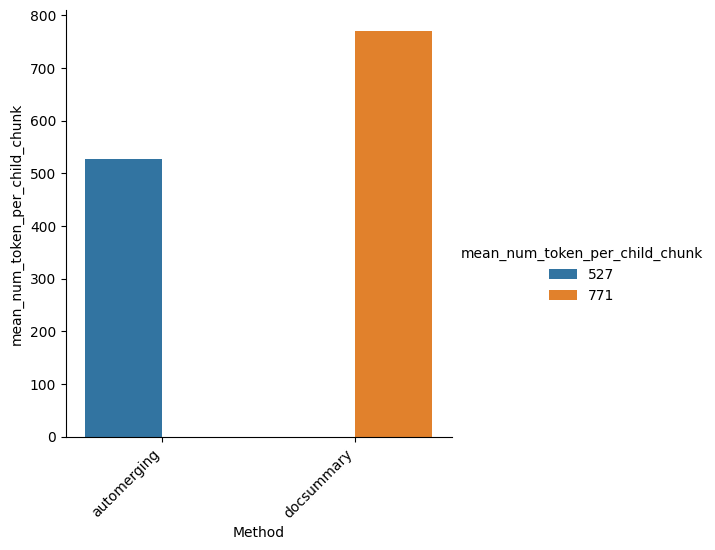

In [81]:
sns.catplot(x = 'Method', y='mean_num_token_per_child_chunk', 
            hue = 'mean_num_token_per_child_chunk',data=data, 
            kind='bar')
plt.xticks(rotation=45, ha='right');

In [29]:
!pip install plotly


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [30]:
df.columns

Index(['ID', 'Method', 'total_num_fies', 'total_num_pages',
       'min_num_tokens_per_page', 'mean_num_tokens_per_page',
       'median_num_tokens_per_page', 'max_num_tokens_per_page',
       'num_parent_chunks', 'min_num_tokens_per_parent_chunk',
       'mean_num_tokens_per_parent_chunk',
       'median_num_tokens_per_parent_chunk', 'max_num_tokens_per_parent_chunk',
       'num_child_chunks', 'min_um_token_per_child_chunk',
       'mean_um_token_per_child_chunk', 'median_um_token_per_child_chunk',
       'max_um_token_per_child_chunk'],
      dtype='object')

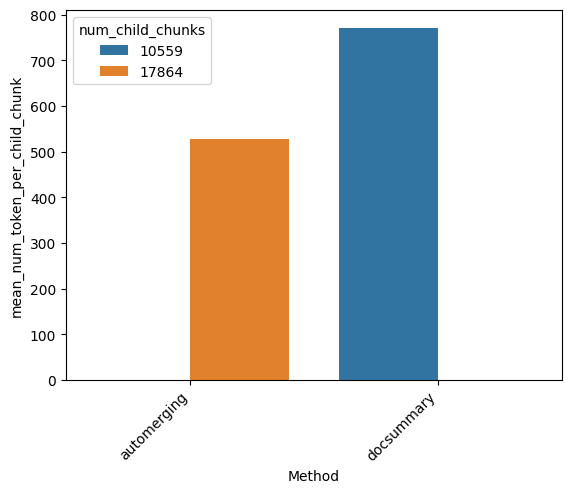

In [50]:
import pandas as pd
import plotly.express as px

data = df[df.num_child_chunks !=0]

sns.barplot(x='Method', y='mean_num_token_per_child_chunk', data=data, hue='num_child_chunks');
plt.xticks(rotation=45, ha='right');